## Imports:

In [191]:
import numpy as np
import pandas as pd

import sklearn as skl
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
import sklearn.model_selection as modsel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf

# Energy Efficiency

In [124]:
df2 = pd.read_excel("ENB2012_data.xlsx")
df2

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [119]:
x = df2.iloc[: , :-2]
x

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [134]:
temp = df2.T
y_heat = temp.iloc[-2]
y_heat

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64

In [135]:
y_cool = temp.iloc[-1]
y_cool

0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Y2, Length: 768, dtype: float64

In [136]:
x_heat_train, x_heat_test, y_heat_train, y_heat_test = train_test_split(x, y_heat, test_size = 0.2)
x_cool_train, x_cool_test, y_cool_train, y_cool_test = train_test_split(x, y_cool, test_size = 0.2)

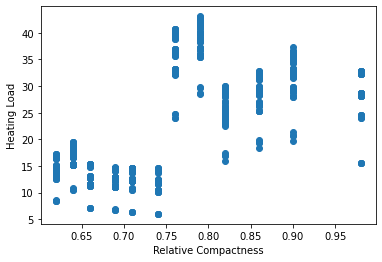

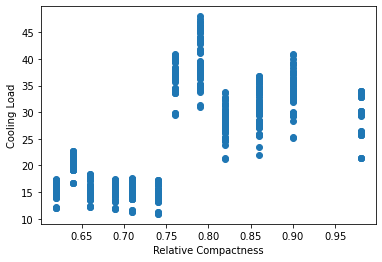

In [207]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('Relative Compactness')
ax.set_ylabel('Heating Load')
ax.scatter(x['X1'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Relative Compactness')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X1'],y_cool)
plt.show()

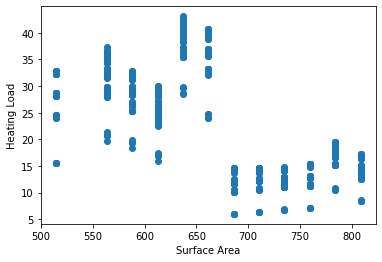

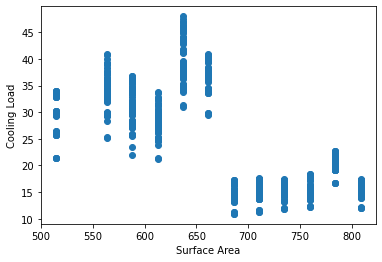

In [208]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('Surface Area')
ax.set_ylabel('Heating Load')
ax.scatter(x['X2'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Surface Area')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X2'],y_cool)
plt.show()

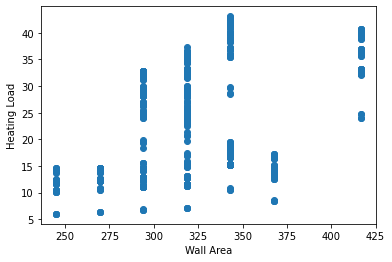

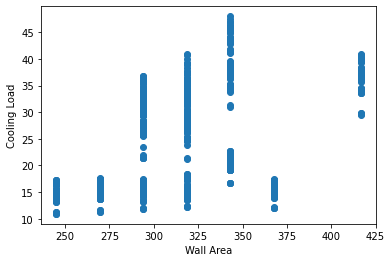

In [209]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('Wall Area')
ax.set_ylabel('Heating Load')
ax.scatter(x['X3'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Wall Area')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X3'],y_cool)
plt.show()

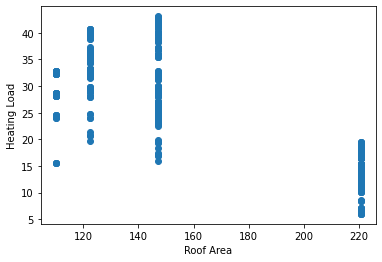

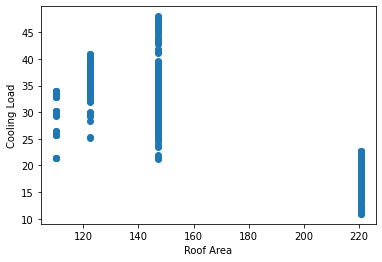

In [210]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('Roof Area')
ax.set_ylabel('Heating Load')
ax.scatter(x['X4'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Roof Area')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X4'],y_cool)
plt.show()


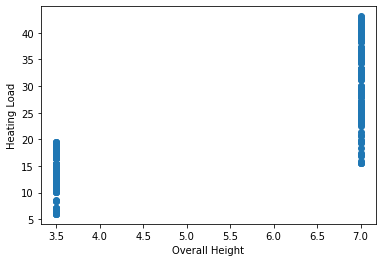

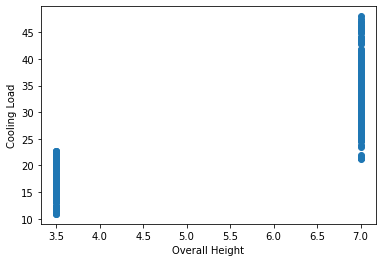

In [211]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('Overall Height')
ax.set_ylabel('Heating Load')
ax.scatter(x['X5'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Overall Height')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X5'],y_cool)
plt.show()

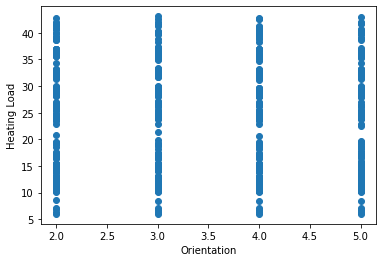

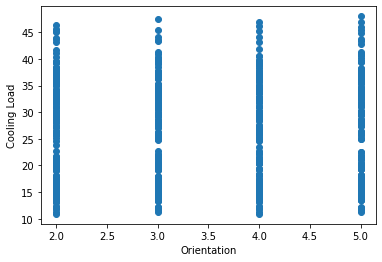

In [212]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('Orientation')
ax.set_ylabel('Heating Load')
ax.scatter(x['X6'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Orientation')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X6'],y_cool)
plt.show()


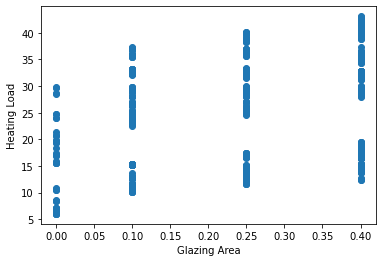

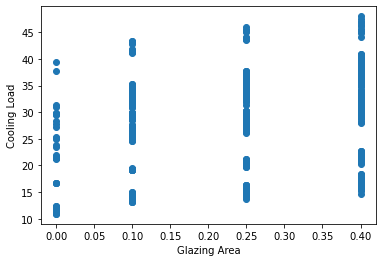

In [213]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('Glazing Area')
ax.set_ylabel('Heating Load')
ax.scatter(x['X7'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Glazing Area')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X7'],y_cool)
plt.show()

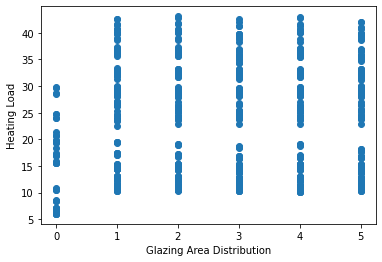

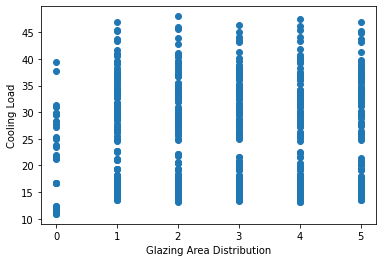

In [214]:

plt.figure()
ax = plt.axes()
ax.set_xlabel('Glazing Area Distribution')
ax.set_ylabel('Heating Load')
ax.scatter(x['X8'],y_heat)
plt.show()

plt.figure()
ax = plt.axes()
ax.set_xlabel('Glazing Area Distribution')
ax.set_ylabel('Cooling Load')
ax.scatter(x['X8'],y_cool)
plt.show()

# Lasso

In [252]:
# experimenting between 0.1 and 0.9 led 0.2 to be the best performing model
model_EE_lasso = Lasso(alpha = 0.2)

In [245]:
model_EE_lasso.fit(x_heat_train, y_heat_train)
y_heat_lasso_pred = model_EE_lasso.predict(x_heat_test)

In [246]:
print("Heating R2: ", r2_score(y_heat_test, y_heat_lasso_pred))
print("Heating Explained Variance:", explained_variance_score(y_heat_test, y_heat_lasso_pred))
print("Heating MSE:", mean_squared_error(y_heat_test,  y_heat_lasso_pred))

Heating R2:  0.8826122979721926
Heating Explained Variance: 0.8827748562333637
Heating MSE: 12.152982915562488


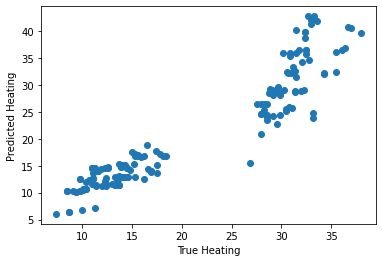

In [247]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('True Heating')
ax.set_ylabel('Predicted Heating')
ax.scatter(y_heat_lasso_pred, y_heat_test)
plt.show()


In [248]:
model_EE_lasso.fit(x_cool_train, y_cool_train)
y_cool_lasso_pred = model_EE_lasso.predict(x_cool_test)

In [251]:
print("Cooling R2: ", r2_score(y_cool_test, y_cool_lasso_pred))
print("Cooling Variance:", explained_variance_score(y_cool_test, y_cool_lasso_pred))
print("Cooling MSE:", mean_squared_error(y_cool_test,  y_cool_lasso_pred))

Cooling R2:  0.8647073274840782
Cooling Variance: 0.8649727891104108
Cooling MSE: 12.239661787675512


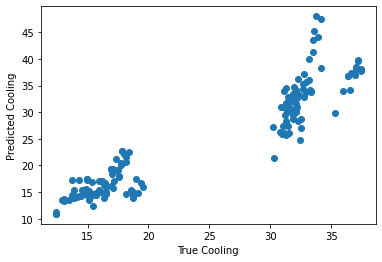

In [250]:
plt.figure()
ax = plt.axes()
ax.set_xlabel('True Cooling')
ax.set_ylabel('Predicted Cooling')
ax.scatter(y_cool_lasso_pred, y_cool_test)
plt.show()

## Linear Regression

In [173]:
model_EE_linreg = LinearRegression()
model_EE_linreg.fit(x_heat_train, y_heat_train)
y_heat_linreg_pred = model_EE_linreg.predict(x_heat_test)

print("Heating R2: ", r2_score(y_heat_test, y_heat_linreg_pred))
print("Heating Explained Variance:", explained_variance_score(y_heat_test, y_heat_linreg_pred))
print("Heating MSE:",mean_squared_error(y_heat_test,  y_heat_linreg_pred))

Heating R2:  0.9174778678381815
Heating Explained Variance: 0.9176124147791151
Heating MSE: 8.543399734333338


In [174]:
model_EE_linreg.fit(x_cool_train, y_cool_train)
y_cool_linreg_pred = model_EE_linreg.predict(x_cool_test)
print("Cooling R2: ", r2_score(y_cool_test, y_cool_linreg_pred))
print("Cooling Explained Variance:", explained_variance_score(y_cool_test, y_cool_linreg_pred))
print("Cooling MSE:", mean_squared_error(y_cool_test,  y_cool_linreg_pred))

Cooling R2:  0.9045065924358381
Cooling Explained Variance: 0.9050298769028695
Cooling MSE: 8.63910062387486


# SGD

In [195]:
model_EE_SGD = make_pipeline(StandardScaler(), SGDRegressor(shuffle = True, max_iter = 1200, tol=0.003))
model_EE_SGD.fit(x_heat_train, np.ravel(y_heat_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=1200, tol=0.003))])

In [199]:
y_heat_SGD_pred = model_EE_SGD.predict(x_heat_test)
print("Heating R2: ", r2_score(y_heat_test, y_heat_SGD_pred))
print("Heating Explained Variance:", explained_variance_score(y_heat_test, y_heat_SGD_pred))
print("Heating MSE:",mean_squared_error(y_heat_test,  y_heat_SGD_pred))

Heating R2:  0.8616283092768405
Heating Explained Variance: 0.9074610221950669
Heating MSE: 14.325425613644791


In [197]:
model_EE_SGD.fit(x_cool_train, np.ravel(y_cool_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=1200, tol=0.003))])

In [200]:
y_cool_SGD_pred = model_EE_SGD.predict(x_cool_test)
print("Cooling R2: ", r2_score(y_cool_test, y_cool_SGD_pred))
print("Cooling Explained Variance:", explained_variance_score(y_cool_test, y_cool_SGD_pred))
print("Cooling MSE:",mean_squared_error(y_cool_test,  y_cool_SGD_pred))

Cooling R2:  0.9023189497509675
Cooling Explained Variance: 0.902711398494542
Cooling MSE: 8.837012351665937
